## **SALIFORT MOTORS: HR ANALYTICS**

Case Study

Salifort Motors, a fictional French-based alternative energy vehicle manufacturer, aims to analyze their HR data and come up with insights and recommendations to improve employee retention.

**PACE Framework (Plan - Analyze - Construct - Execute)**
## Planning
To address employee turnover at Salifort Motors, this notebook will build a model to predict whether an employee will leave or stay based on different data points.

**Objectives**
1. **Identify Key Factors:** Use statistical and machine learning techniques to identify the primary factors that contribute to employee turnover.
2. **Predict Employee Turnover:** Build and validate predictive model to determine likelihood of employee turnover.
3. **Develop Retention Strategies:** Formulate strategies to improve employee satisfaction and retention.


### **Data Dictionary**

There are 15,000 rows and 10 columns for the variables listed below.

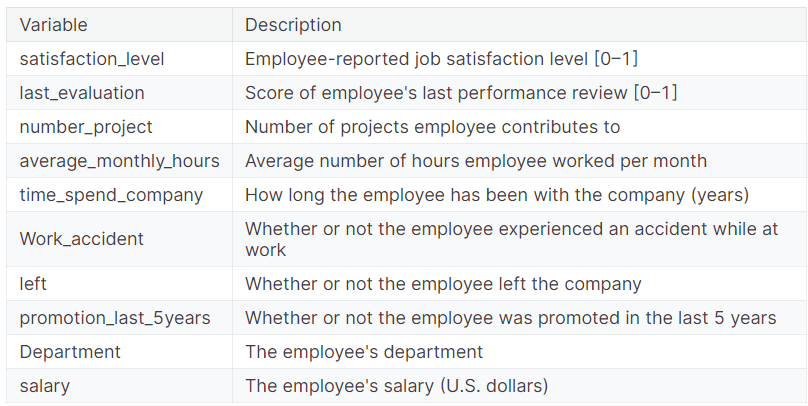

### **Initial Exploratory Data Analysis**

In [1]:
# Importing Data Manipulation & Visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/A Python Learning Coursera/HR_capstone_dataset.xlsx')

In [3]:
df.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
Department,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking for blank values in the dataset
df.isna().sum()
# There are no blank values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
# Checking for duplicated values in the dataset
df.duplicated().sum()

3008

In [8]:
df[df.duplicated()].head(10).T

,396,866,1317,1368,1461,1516,1616,1696,1833,12000
satisfaction_level,0.46,0.41,0.37,0.41,0.42,0.4,0.37,0.39,0.1,0.38
last_evaluation,0.57,0.46,0.51,0.52,0.53,0.5,0.46,0.56,0.85,0.53
number_project,2,2,2,2,2,2,2,2,6,2
average_montly_hours,139,128,127,132,142,127,156,160,266,157
time_spend_company,3,3,3,3,3,3,3,3,4,3
Work_accident,0,0,0,0,0,0,0,0,0,0
left,1,1,1,1,1,1,1,1,1,1
promotion_last_5years,0,0,0,0,0,0,0,0,0,0
Department,sales,accounting,sales,RandD,sales,IT,sales,sales,sales,sales
salary,low,low,medium,low,low,low,low,low,low,low


In [9]:
# The likelihood of duplicate values in 10 columns is very low, therefore the duplicates will be dropped.
df1 = df.drop_duplicates()

In [10]:
df1.value_counts().sum()

11991

### **Visualizing the distribution of each variable**

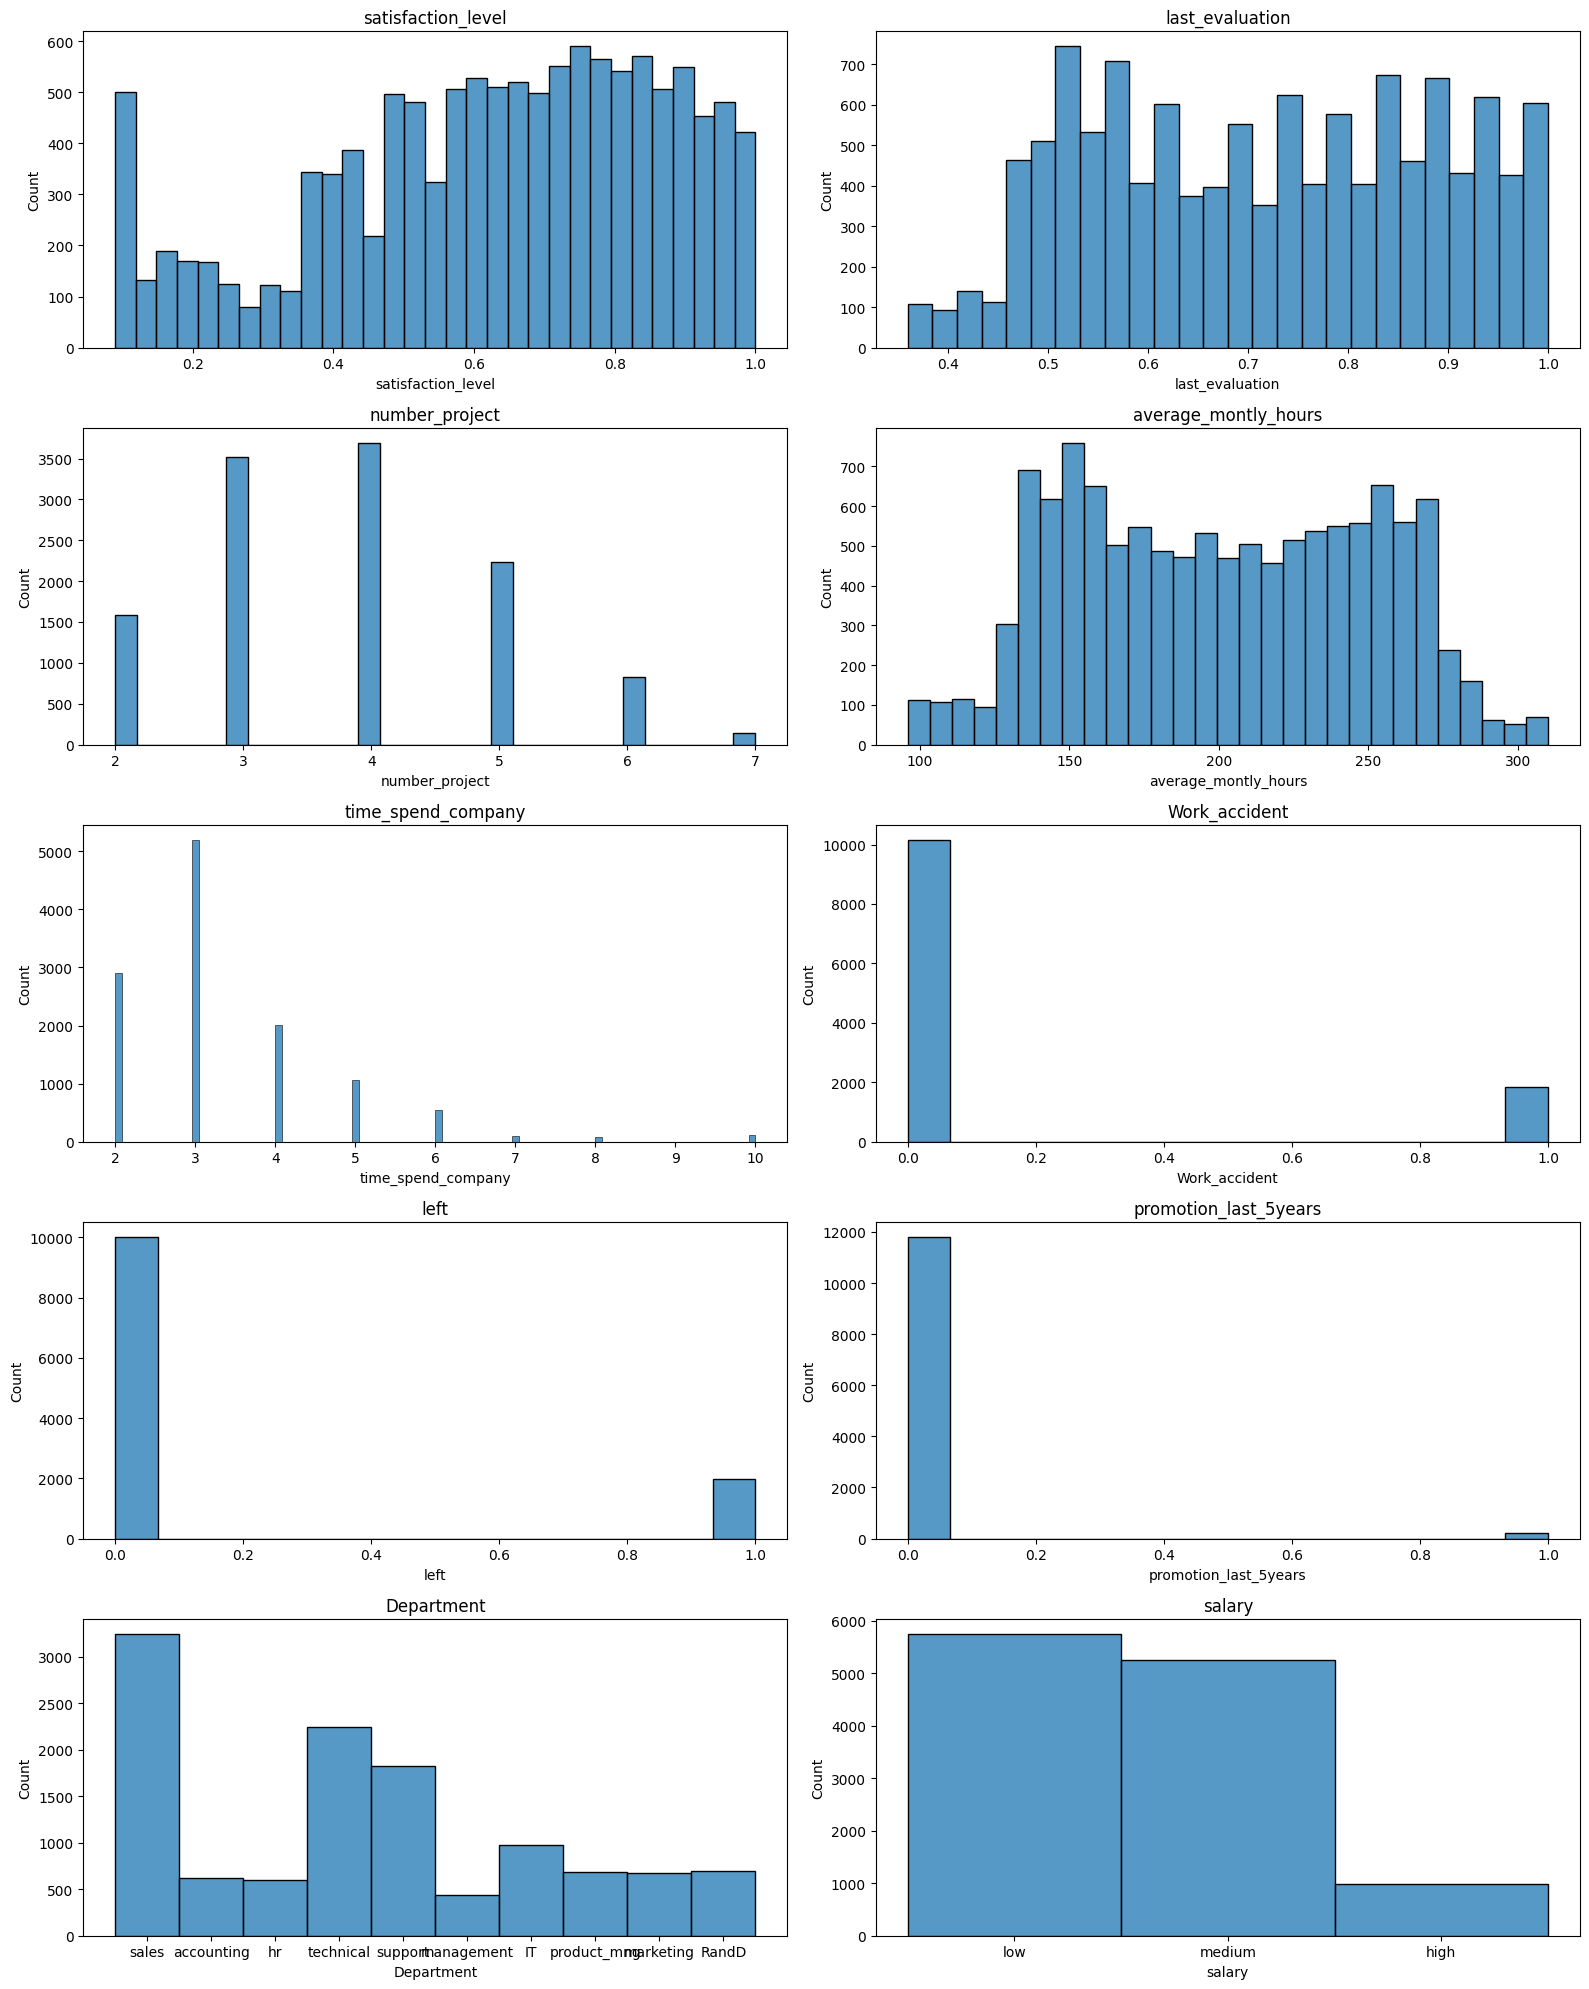

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))

# Visualizing the distribution of all variables
for i, column in enumerate(df1.columns):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df1, x=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()

plt.show()


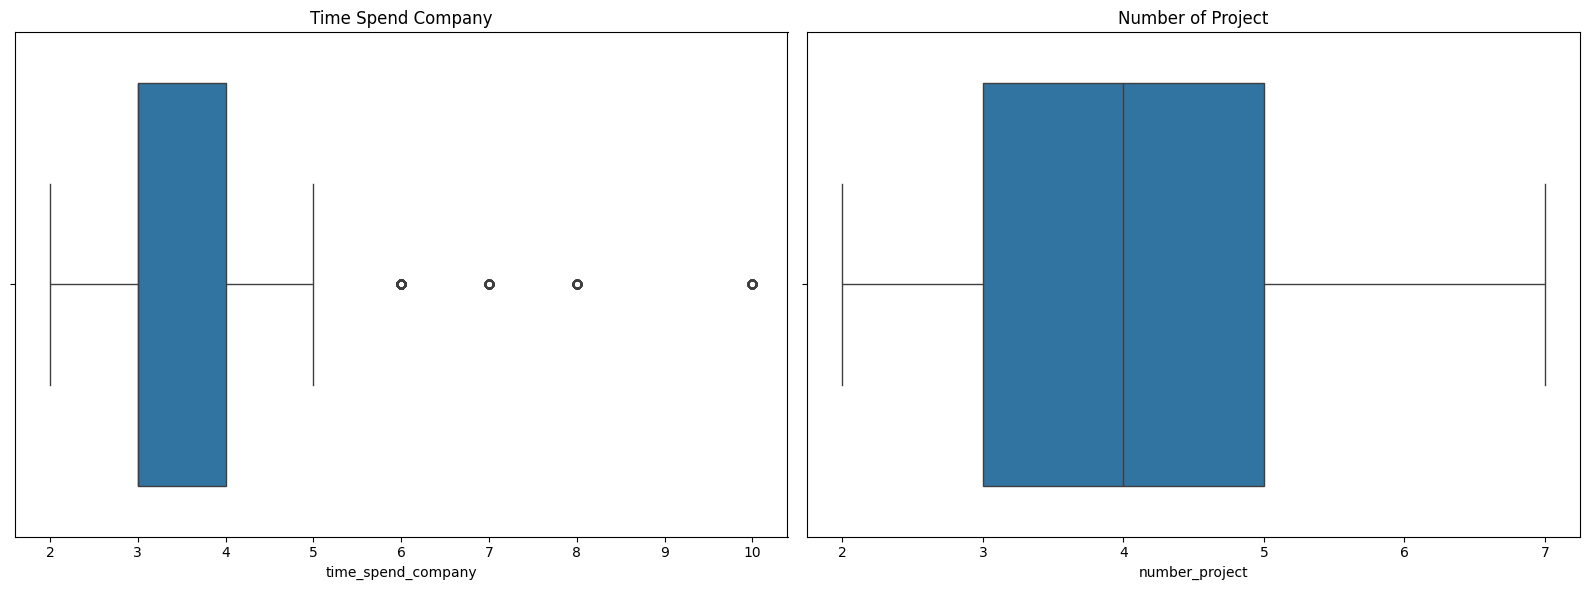

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df1, x='time_spend_company', ax=axes[0])
axes[0].set_title('Time Spend Company')

sns.boxplot(data=df1, x='number_project', ax=axes[1])
axes[1].set_title('Number of Project')

plt.tight_layout()
plt.show()

There seems to be a larger number of outliers for time_spend_company, some models may be sensitive to outliers therefore these outliers should be removed in the Construct phase.

In [13]:
# Removing outliers from time_spend_company and number_project through their interquartile range

Q1_time = df1['time_spend_company'].quantile(0.25)
Q3_time = df1['time_spend_company'].quantile(0.75)
IQR_time = Q3_time - Q1_time
lower_bound_time = Q1_time - 1.5 * IQR_time
upper_bound_time = Q3_time + 1.5 * IQR_time
df1_filtered = df1.loc[(df1['time_spend_company'] >= lower_bound_time) & (df1['time_spend_company'] <= upper_bound_time)]
df1_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11167.0,0.631944,0.239064,0.09,0.49,0.66,0.82,1.0
last_evaluation,11167.0,0.715901,0.167595,0.36,0.57,0.72,0.86,1.0
number_project,11167.0,3.786066,1.164198,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11167.0,200.144533,48.563047,96.00,157.00,199.00,243.00,310.0
time_spend_company,11167.0,3.109161,0.899277,2.00,2.00,3.00,4.00,5.0
Work_accident,11167.0,0.152413,0.359437,0.00,0.00,0.00,0.00,1.0
left,11167.0,0.168532,0.374355,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11167.0,0.014417,0.119209,0.00,0.00,0.00,0.00,1.0


## Analyze
In the analyze stage, the features contributing to employee turnover will be explored in depth, conducting tasks not limited to:
1. Understanding Data for Accurate Predictions
2. Data Exploration and Structuring
3. Exploring Predictor Variables
4. Feature Engineering

### **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

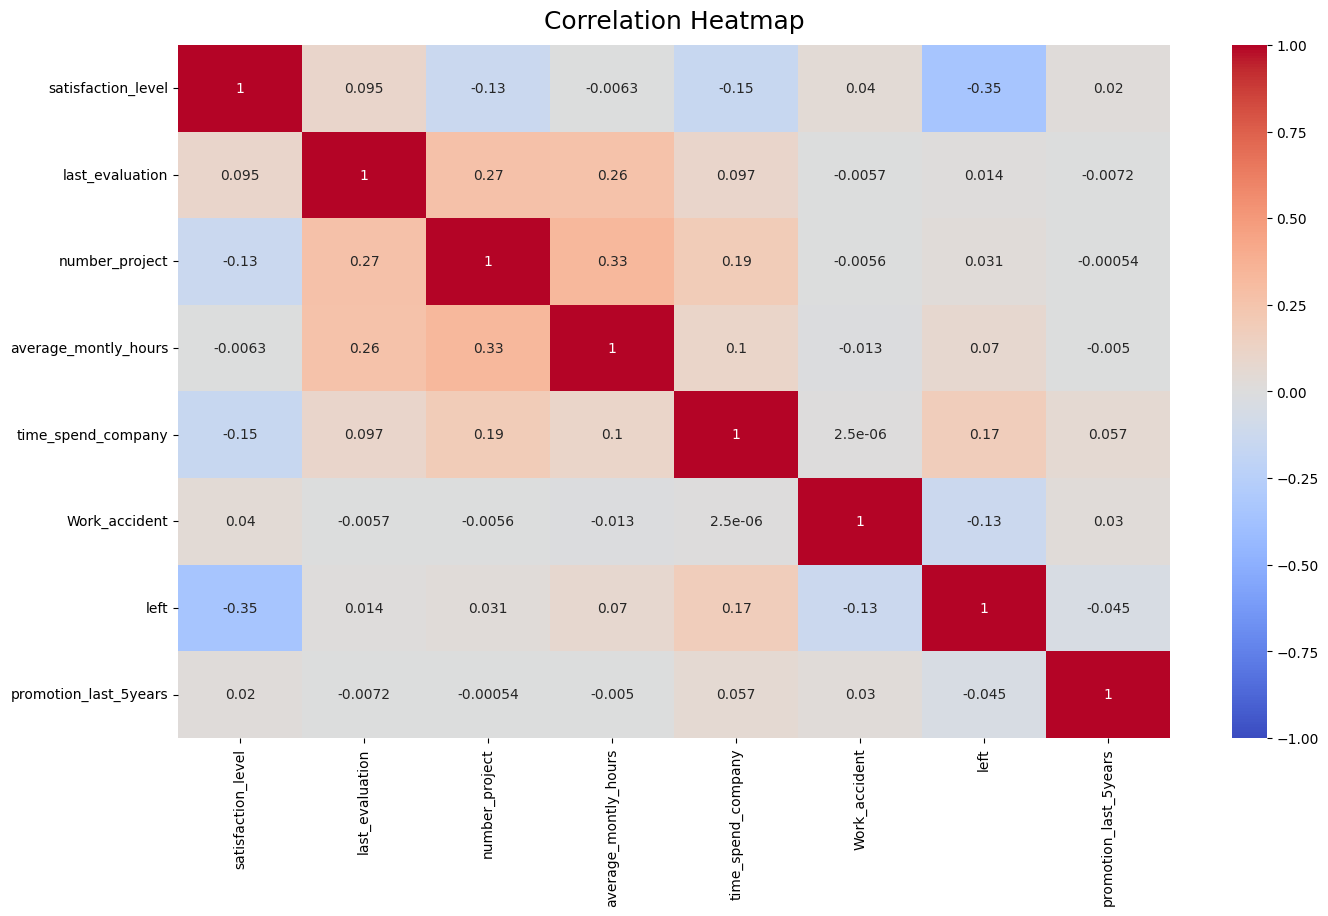

In [14]:
# Creating a Correlation Heatmap to identify relationships between the features
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Observations:

The Strongest Correlations are as follows:

**Left vs Satisfaction Level (Moderate Negative Correlation):** Lower Satisfaction levels are correlated with higher turnover amongst staff.

**Number of Projects vs Average Monthly Hours (Moderate Positive Correlation)**: The more projects an employee takes, the higher the average monthly hours.

**Last Evaluation vs Average Monthly Hours and Number of Projects (Moderate Positive Correlation):** Higher Scores of the last evaluation is correlated with a higher workload (average monthly hours and more number of projects).

### **Exploring Satisfaction Levels of Current and Ex-Employees**



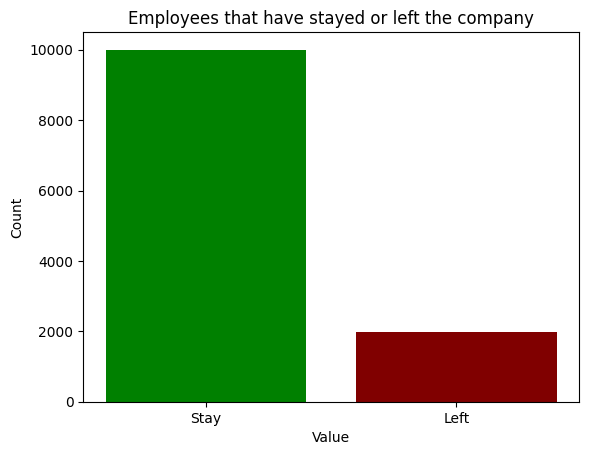

In [15]:
# Initial visualization on number of employees that have stayed or left
value_counts = df1['left'].value_counts()
plt.bar(value_counts.index, value_counts.values, color=['green','#800000'])

plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Employees that have stayed or left the company")
plt.xticks(value_counts.index, ['Stay', 'Left'])

plt.show()

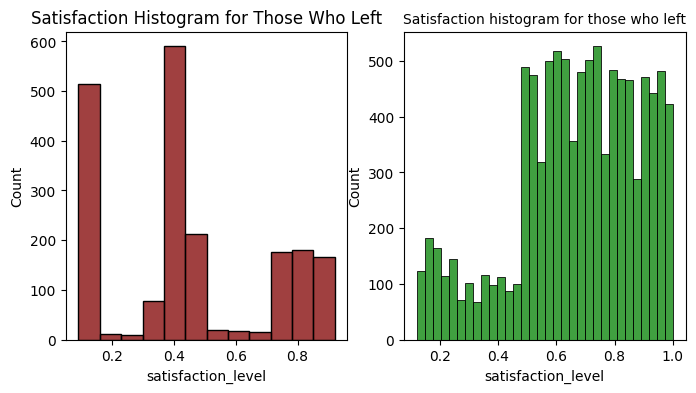

In [16]:
#Satisfaction Levels of Current vs Ex-Employees
plt.figure(figsize=(8,4))
satisfaction_left = df1[df1['left']==1]['satisfaction_level']
satisfaction_stay = df1[df1['left']==0]['satisfaction_level']
plt.subplot(121)
sns.histplot(data=satisfaction_left, color='#800000')
plt.title('Satisfaction Histogram for Those Who Left')

plt.subplot(122)
sns.histplot(data=satisfaction_stay, color='green')
plt.title('Satisfaction Histogram for Those Who Stayed')

plt.title('Satisfaction histogram for those who left', fontsize='10')

plt.show()

Observations:
1. Current employee levels are on average higher than ex-employees
2. Employees below a satisfaction level of 0.5 are more likely to leave the company, seen in the drop in count of current employees for those who stayed and rise in count of ex-employees who have left below levels of 0.5
3. There are ~400 employees with high satisfaction levels (0.8 to 1.0) that have left, compared to ~1400 employees that have left the company with satisfaction below 0.5

### **Number of Projects vs Monthly Hours**

Text(0.5, 1.0, 'Number of Projects vs Average Monthly Hours')

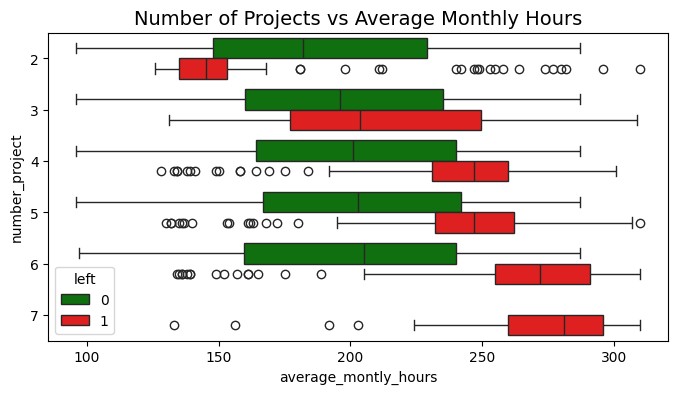

In [17]:
# Number of Projects vs Monthly Hours
plt.figure(figsize=(8, 4))
colors = ["green", "red" ]
sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left', orient='h', palette=colors)
plt.title('Number of Projects vs Average Monthly Hours', fontsize='14')

Observations:

1. Ex-employees can be observed to work higher hours than current employees when the number of projects >2, with a median of above 200 hours per month. The high workload and lack of work-life balance may be one of the reasons that employees leave the company.
2. In comparison, the average monthly hours worked by an employee is around 150 hours, 25% less than 200.
2. Employees that worked on 7 projects at once have all left the company, suggesting that they may be dissatisfied with overworking.

### **Last Evaluation vs Average Monthly Hours and Number of Projects**

<Axes: xlabel='average_montly_hours', ylabel='last_evaluation'>

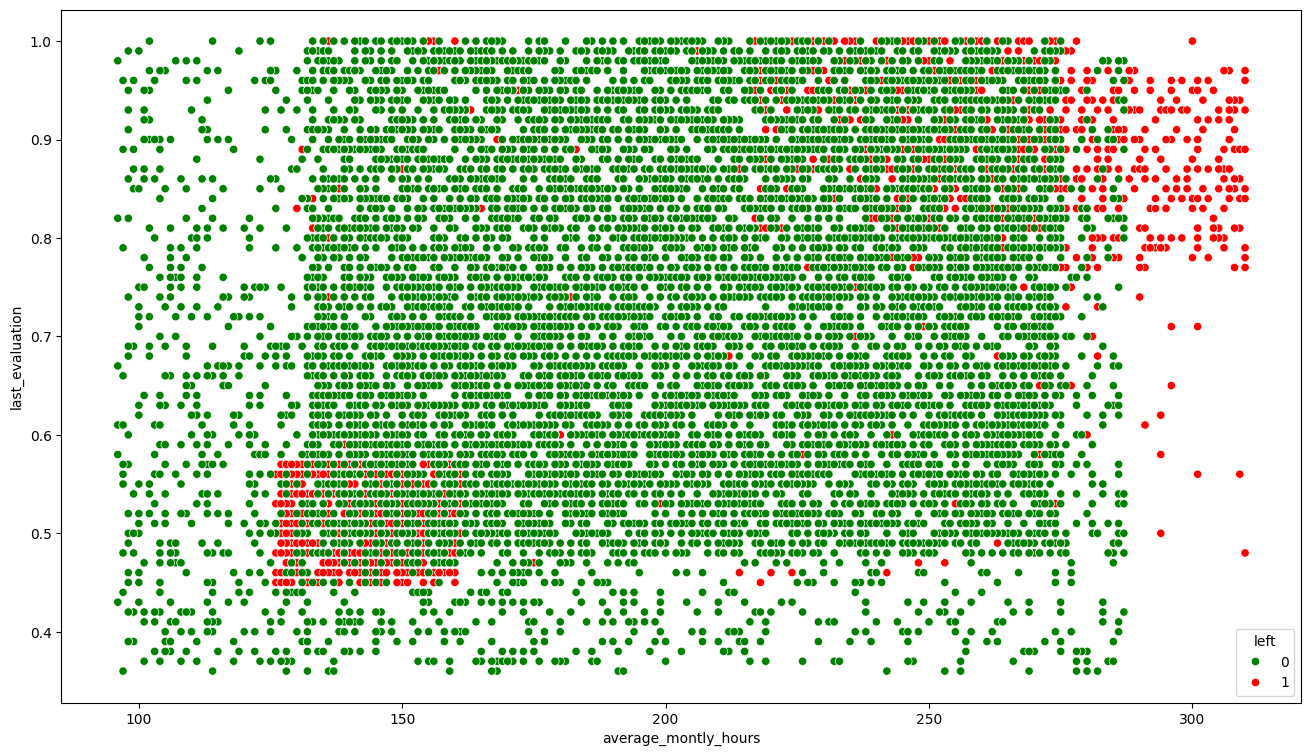

In [18]:
plt.figure(figsize=(16, 9))
colors = ["green","red"]
sns.scatterplot(data=df1, x='average_montly_hours', y='last_evaluation', hue='left', palette=colors)

<Axes: xlabel='number_project', ylabel='last_evaluation'>

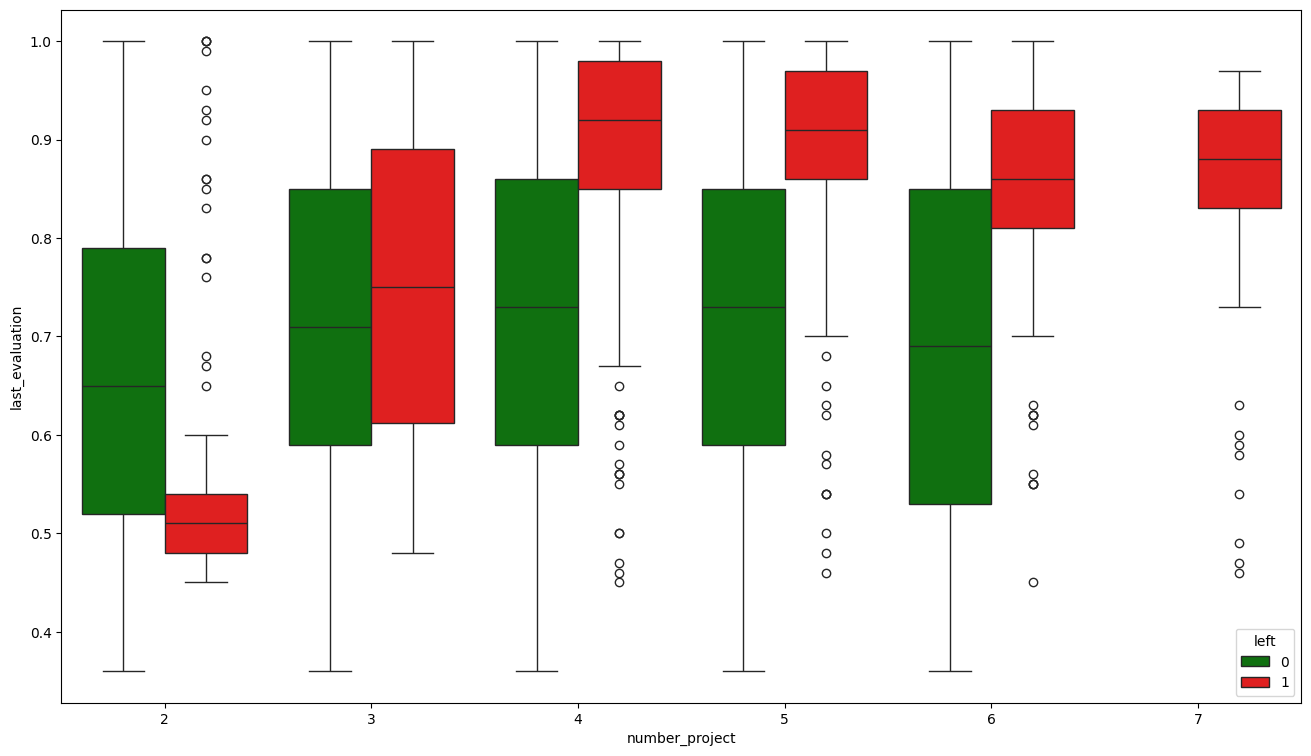

In [19]:
plt.figure(figsize=(16, 9))
colors = ["green","red"]
sns.boxplot(data=df1, x='number_project', y='last_evaluation', hue='left', palette=colors)

Observations (Average Monthly Hours)
1. There are two main groups relating to those who have left. Those that have a lower last_evaluation score (0.4-0.6) that have worked around 150 hours, and a higher last_evaluation_score (0.8-1.0) that have worked more than 250 hours
2. This suggests workers may be pressured to work more hours else they receive a lower evaluation score than their peers.

Observations (Number of Projects)
1. It can be seen that the employees that have left are high performers, with high median evaluation scores of 0.8 to 1 when they have worked more than 3 projects.
2. Combining this observation with the number of projects vs monthly hours, it can be seen that the leavers work above a median of 200 hours, which suggest signs of overwork.
3. Employees may be suggested to work more than 2 projects, lest their evaluation score be negatively affected (0.4 to 0.6).

### **Satisfaction vs Number of Projects**

Text(0.5, 1.0, 'Satisfaction vs Number of Projects')

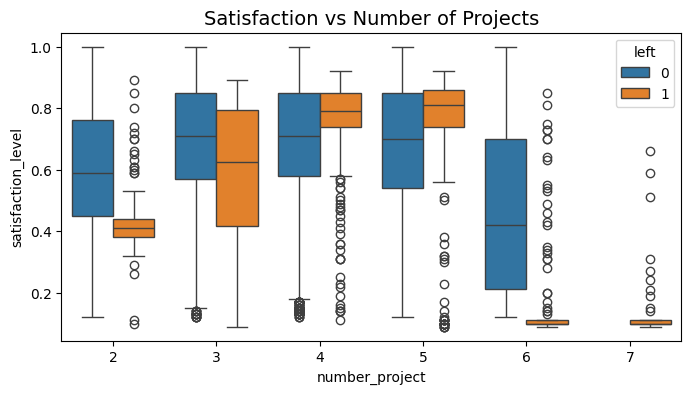

In [116]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df1, x='number_project', y='satisfaction_level', hue='left')
plt.title('Satisfaction vs Number of Projects', fontsize='14')


### **Ex-Employee Count according to Time spent in company**

Text(0.5, 1.0, 'Count of Employees that have left by Time Spend Company')

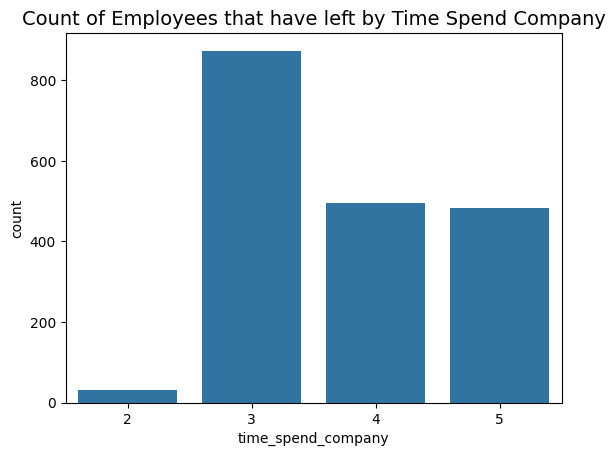

In [126]:
sns.countplot(data=df1[df1['left']==1], x='time_spend_company')
plt.title('Count of Employees that have left by Time Spend Company', fontsize='14')


### **Satisfaction of Ex-employees according to time spent in company**

Text(0.5, 1.0, 'Satisfaction of Employees that have left by Time Spend in Company')

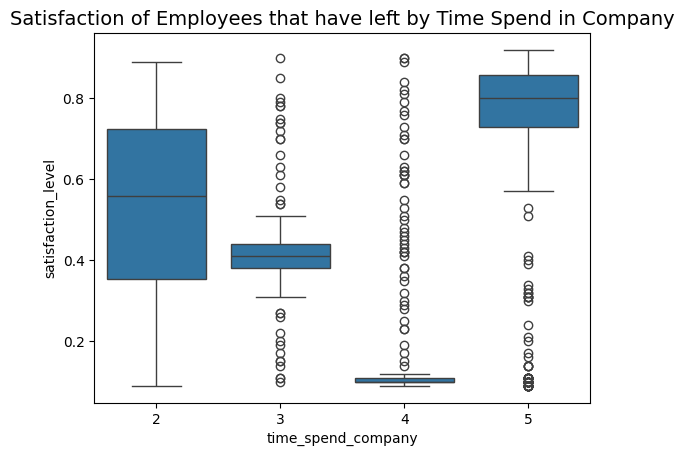

In [131]:
sns.boxplot(data=df1[df1['left']==1], x='time_spend_company', y='satisfaction_level')
plt.title('Satisfaction of Employees that have left by Time Spend in Company', fontsize='14')


### **Employee turnover in different departments and salary levels**

<Axes: xlabel='Department', ylabel='count'>

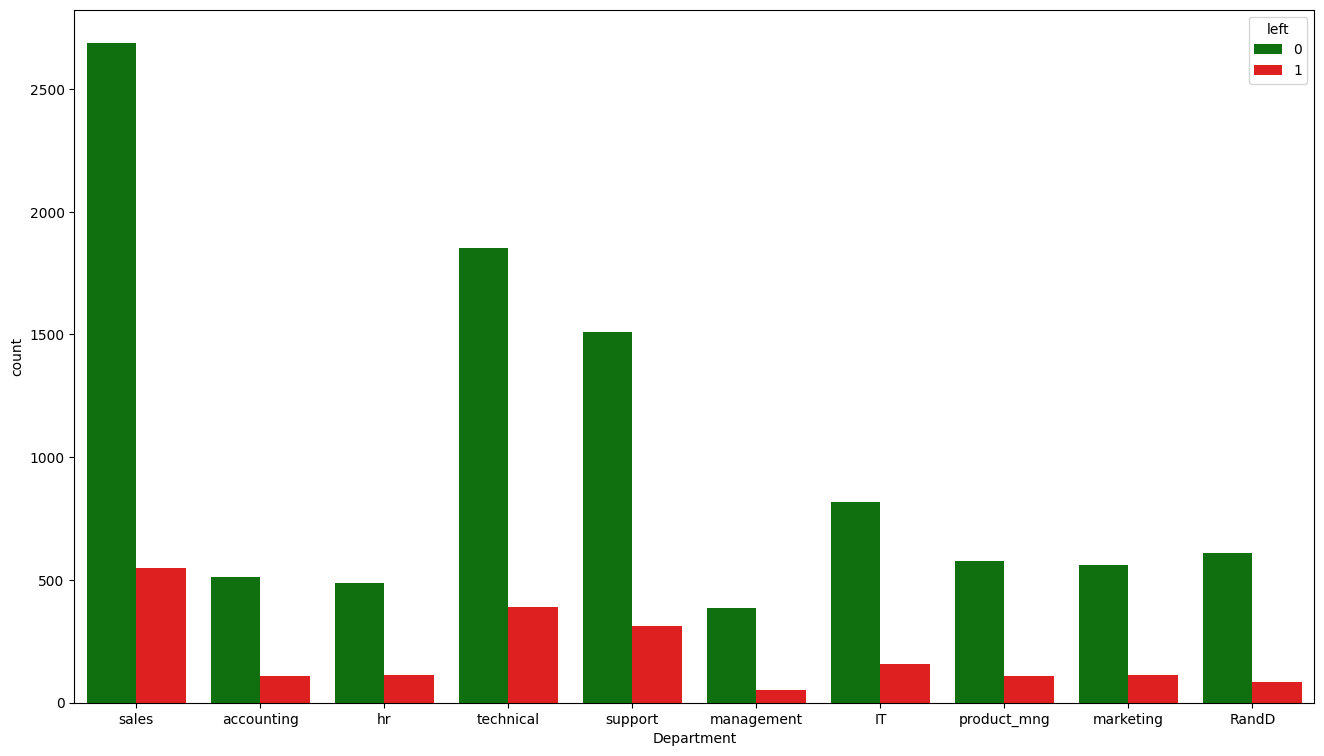

In [20]:
plt.figure(figsize=(16, 9))
colors = ["green","red"]
sns.countplot(data=df1, x='Department', hue='left', palette=colors)

Observation:

Turnover rate appears to be similar across departments, as we explore below, this ranges from 11 to 19% across departments, with no specific department experiencing abnormal rates of turnover.

In [21]:
# Percentage of employee turnover
result = df1.groupby('Department')['left'].mean() * 100
result = result.sort_values(ascending=False)
print(result)

Department
hr             18.801997
accounting     17.552335
technical      17.379679
support        17.133443
sales          16.980550
marketing      16.641902
IT             16.188525
product_mng    16.034985
RandD          12.247839
management     11.926606
Name: left, dtype: float64


This raises the question - is a higher turnover related to a lower satisfaction rate in different departments?

This is not the case, as the satisfaction level of current employees are similar to the other departments, suggesting that employees are leaving the company not due to its specific job nature.

Text(0.5, 1.0, 'Boxplot of Satisfaction Level vs Department')

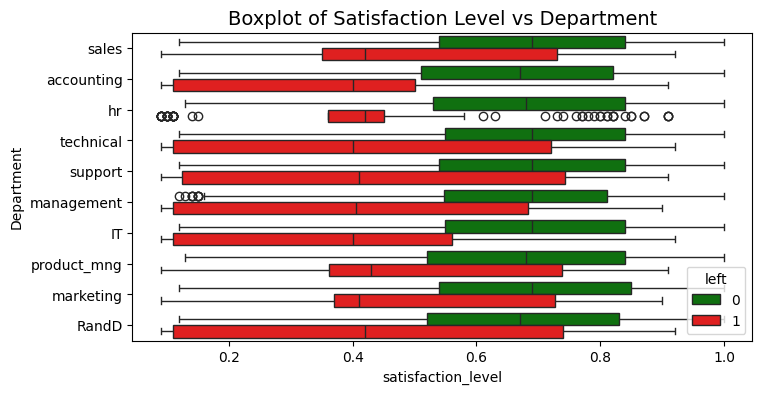

In [22]:
plt.figure(figsize=(8, 4))
colors = ['green','red']
sns.boxplot(data=df1, x='satisfaction_level', y='Department', hue='left',orient='h', palette=colors)
plt.title('Boxplot of Satisfaction Level vs Department', fontsize='14')

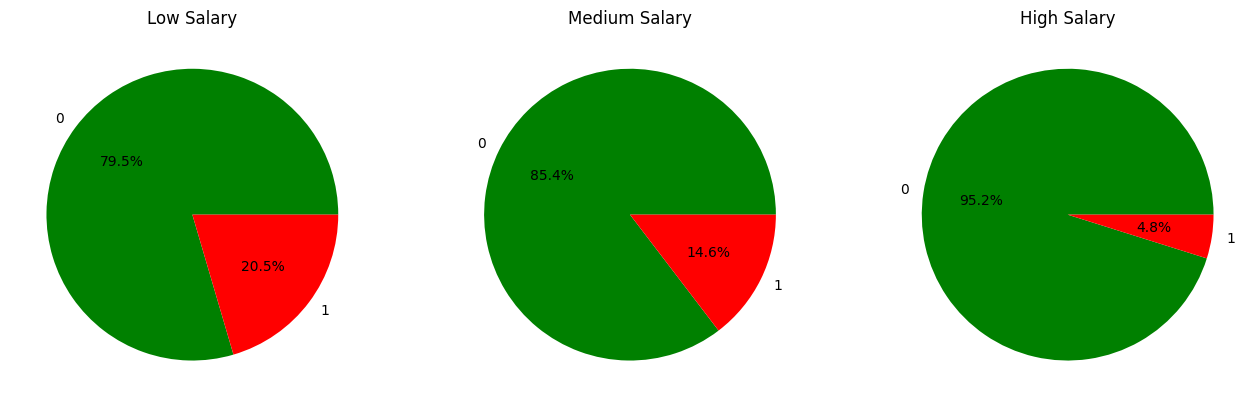

In [23]:
# Left by Salary Level
plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 1)
left_low_salary = df1[df1['salary']=='low']['left'].value_counts()
plt.pie(left_low_salary, labels=left_low_salary.index, autopct='%1.1f%%',colors=colors)
plt.title('Low Salary')
plt.subplot(1, 3, 2)
left_medium_salary = df1[df1['salary']=='medium']['left'].value_counts()
plt.pie(left_medium_salary, labels=left_medium_salary.index, autopct='%1.1f%%',colors=colors)
plt.title('Medium Salary')
plt.subplot(1, 3, 3)
left_high_salary = df1[df1['salary']=='high']['left'].value_counts()
plt.pie(left_high_salary, labels=left_high_salary.index, autopct='%1.1f%%',colors=colors)
plt.title('High Salary')
plt.show()


Observation:
Employees are more likely to leave at lower salary ranges, with Low (20.5%), Medium (14.6^), but less likely to leave a high salary ranges (4.8%). This suggests that monetary rewards are effective in Salifort Motors.

## Construct
Using the features we have selected, the model predicting employee turnover can be constructed. This will include steps:
1. Constructing the classification model
2. Hyperparameter Tuning
3. Model Training
4. Cross-Validation

### **Normalization, OverSampling, Train-Test-Split**

Remove outliers through interquartlie range - done in planning phase

In [24]:
# df1_filtered has filtered out the outliers in time_spend_company
df1 = df1_filtered.copy()
df1.head().T

,0,2,3,4,5
satisfaction_level,0.38,0.11,0.72,0.37,0.41
last_evaluation,0.53,0.88,0.87,0.52,0.5
number_project,2,7,5,2,2
average_montly_hours,157,272,223,159,153
time_spend_company,3,4,5,3,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
Department,sales,sales,sales,sales,sales
salary,low,medium,low,low,low


In [25]:
df1["average_monthly_hours"] = df1["average_montly_hours"]
df1["work_accident"] = df1["Work_accident"].astype("category")
df1["left"] = df1["left"].astype("category")
df1["department"] = df1["Department"].astype("category")
df1["salary"] = df1["salary"].astype("category")
df1["promotion_last_5years"] = df1["promotion_last_5years"].astype("category")
df1 = df1.drop(['average_montly_hours','Department','Work_accident'],axis=1)

In [26]:
df1.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,promotion_last_5years,salary,average_monthly_hours,work_accident,department
0,0.38,0.53,2,3,1,0,low,157,0,sales
2,0.11,0.88,7,4,1,0,medium,272,0,sales
3,0.72,0.87,5,5,1,0,low,223,0,sales
4,0.37,0.52,2,3,1,0,low,159,0,sales
5,0.41,0.50,2,3,1,0,low,153,0,sales


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     11167 non-null  float64 
 1   last_evaluation        11167 non-null  float64 
 2   number_project         11167 non-null  int64   
 3   time_spend_company     11167 non-null  int64   
 4   left                   11167 non-null  category
 5   promotion_last_5years  11167 non-null  category
 6   salary                 11167 non-null  category
 7   average_monthly_hours  11167 non-null  int64   
 8   work_accident          11167 non-null  category
 9   department             11167 non-null  category
dtypes: category(5), float64(2), int64(3)
memory usage: 578.8 KB


In [28]:
dfx = df1.drop("left" ,axis =1)
dfy = df1["left"]

**One-hot encoding**

As the category of salary (Low-Medium-High) is ordered, integers 0-2 can more ideally represent the salary scale.

In [29]:
dfx = pd.get_dummies(dfx, drop_first=False, columns=['department'])
dfx['salary'] = (dfx['salary'].cat.set_categories(['low', 'medium', 'high']).cat.codes)

In [30]:
dfx.head().T

,0,2,3,4,5
satisfaction_level,0.38,0.11,0.72,0.37,0.41
last_evaluation,0.53,0.88,0.87,0.52,0.5
number_project,2,7,5,2,2
time_spend_company,3,4,5,3,3
promotion_last_5years,0,0,0,0,0
salary,0,1,0,0,0
average_monthly_hours,157,272,223,159,153
work_accident,0,0,0,0,0
department_IT,False,False,False,False,False
department_RandD,False,False,False,False,False


**Implementing Min-Max Scaler**

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler_dfx = pd.DataFrame(scaler.fit_transform(dfx),columns = dfx.columns)
scaler_dfx.head(5)

,satisfaction_level,last_evaluation,number_project,time_spend_company,promotion_last_5years,salary,average_monthly_hours,work_accident,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.318681,0.265625,0.0,0.333333,0.0,0.0,0.285047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.021978,0.812500,1.0,0.666667,0.0,0.5,0.822430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.692308,0.796875,0.6,1.000000,0.0,0.0,0.593458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.307692,0.250000,0.0,0.333333,0.0,0.0,0.294393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.351648,0.218750,0.0,0.333333,0.0,0.0,0.266355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Implementing Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaler_dfx, dfy, test_size=0.2, random_state=1)

In [34]:
y_train.value_counts()

left
0    7434
1    1499
Name: count, dtype: int64

The number of people who are still in the company vastly outnumber those that have left, causing a class imbalance and a need to use the oversampler.

For the logistic regression, decision trees, and KNN, it is best to balance the classes. Random Forest however does not require it and will be addressed later.

In [35]:
from imblearn.over_sampling import RandomOverSampler
overSampler = RandomOverSampler ()
x_over, Y_over = overSampler.fit_resample(X_train,y_train)
Y_over.value_counts()

left
0    7434
1    7434
Name: count, dtype: int64

In [36]:
x_over.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14868.0,0.501336,0.292572,0.0,0.318681,0.494505,0.758242,1.0
last_evaluation,14868.0,0.548136,0.281417,0.0,0.281250,0.562500,0.812500,1.0
number_project,14868.0,0.357856,0.297279,0.0,0.000000,0.400000,0.600000,1.0
time_spend_company,14868.0,0.452202,0.309745,0.0,0.333333,0.333333,0.666667,1.0
promotion_last_5years,14868.0,0.010627,0.102541,0.0,0.000000,0.000000,0.000000,1.0
salary,14868.0,0.270245,0.302248,0.0,0.000000,0.000000,0.500000,1.0
average_monthly_hours,14868.0,0.494437,0.254845,0.0,0.257009,0.481308,0.728972,1.0
work_accident,14868.0,0.109295,0.312020,0.0,0.000000,0.000000,0.000000,1.0
department_IT,14868.0,0.081854,0.274151,0.0,0.000000,0.000000,0.000000,1.0
department_RandD,14868.0,0.052193,0.222423,0.0,0.000000,0.000000,0.000000,1.0


### **Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(random_state=1).fit(x_over,Y_over)
y_pred_logreg = logreg.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred_logreg))

Accuracy score:  0.833034914950761


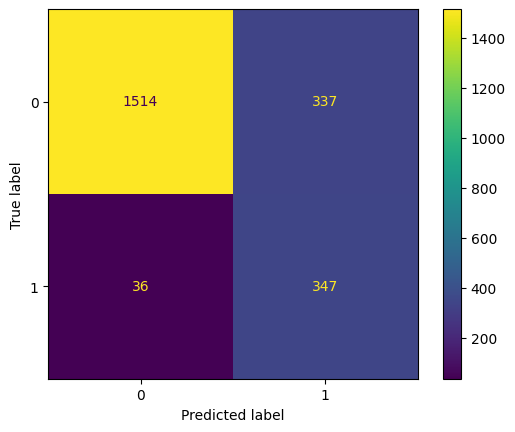

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1851
           1       0.51      0.91      0.65       383

    accuracy                           0.83      2234
   macro avg       0.74      0.86      0.77      2234
weighted avg       0.90      0.83      0.85      2234



**Evaluating the Logistic Regression Model**

The accuracy score of the logistic regression model is 83.6%, with a weighted average of 90% for precision, 84% for recall, and 85% for f1-score. There however seem to be many False positives for employees leaving the company (330), compared to true positives (348).

While this is an overall good prediction result, other models should also be investigated to further seek improvement in accuracy.

### **Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1).fit(x_over,Y_over)
y_pred_tree = tree.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_tree))

Accuracy score:  0.973142345568487


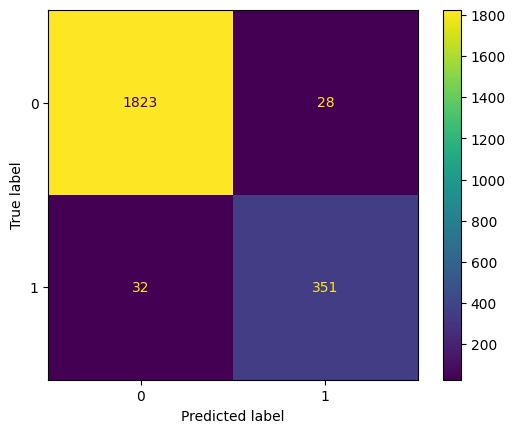

In [43]:
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [45]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1851
           1       0.93      0.92      0.92       383

    accuracy                           0.97      2234
   macro avg       0.95      0.95      0.95      2234
weighted avg       0.97      0.97      0.97      2234



Using a decision tree to predict employee turnover is very effective, with the accuracy score being 97%. Furthermore, the number of true positives and true negatives (total 2174) is very high compared to the false negatives and false positives (total 60).

Moreover, the weighted avg of precision score is 97%, recall 97%, and f1-score of 97%. These factors are a major improvement from logistic regression.

The decision tree will be further modified by hyperparameter tuning.

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(x_over,Y_over)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the decision tree with the best parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(x_over,Y_over)

# Make predictions on the test set
y_pred1 = best_clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.973142345568487


In [65]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


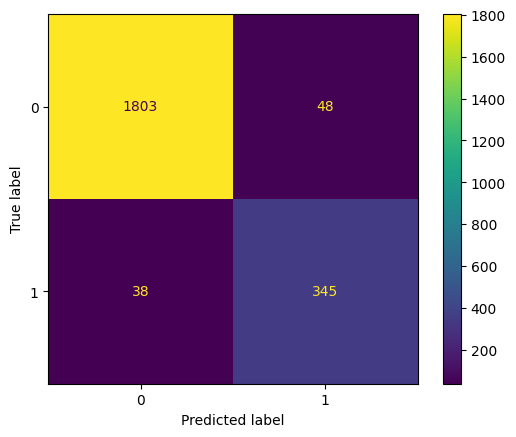

In [66]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [67]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1851
           1       0.88      0.90      0.89       383

    accuracy                           0.96      2234
   macro avg       0.93      0.94      0.93      2234
weighted avg       0.96      0.96      0.96      2234



It appears that the initial Decision Tree is more effective at predicting the y_test values, scoring 1% higher for weighted avg of precision, recall, and f1-score. Thus, it will be decided as the final model for the decision tree.

Other models KNN and Random Forest will be explored further below.

### **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is conducted to classify the values, using the principle that similar data points tend to belong to the same class or have similar output values.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
Knn = KNN.fit(x_over,Y_over)
pred_test = Knn.predict(X_test)
accuracy_score_knn = round(accuracy_score(y_test,pred_test)*100,0)
accuracy_score_knn

91.0

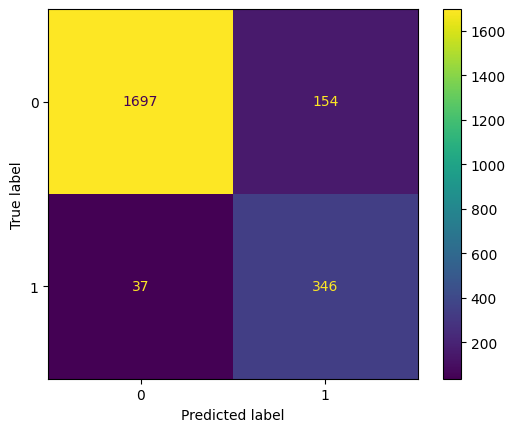

In [76]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [77]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1851
           1       0.69      0.90      0.78       383

    accuracy                           0.91      2234
   macro avg       0.84      0.91      0.87      2234
weighted avg       0.93      0.91      0.92      2234



Using KNN, the accuracy score of 91% is returned, where there are higher instances of false positives of employees leaving the company (154).

Moreover, the weighted average of precision (93%), recall (91%), f1-score (92%), is lower than decision trees by 4-6%.

Next, random forest will be explored in predicting employee turnover.

### **Random Forest Model**

In [90]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_over,Y_over)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9825425246195165


In [84]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'criterion': ['gini', 'entropy']
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')
rf1.fit(x_over,Y_over)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'})

In [85]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9876915779337508


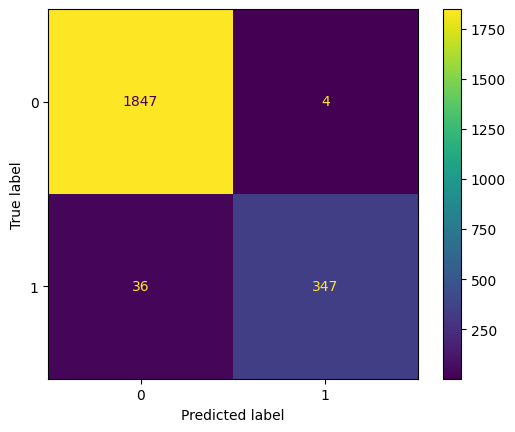

In [87]:
cm = confusion_matrix(y_test, rf1.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [88]:
print(classification_report(y_test,rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1851
           1       0.99      0.91      0.95       383

    accuracy                           0.98      2234
   macro avg       0.98      0.95      0.97      2234
weighted avg       0.98      0.98      0.98      2234



After fine-tuning the hyperparameters of the random forest model, **the outcome is very effective at predicting employee turnover**. The accuracy score is 98.6%, with only 4 False Positives and 36 False Negatives.

The weighted average of precision, recall, and f1-score are 98%, 1% higher than the decision tree model.

### **XGBoost Model**

In [89]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier().fit(x_over, Y_over)
xgb_pred = xgb_model.predict(X_test)
accuracy_score_xgb = round(accuracy_score(y_test,xgb_pred)*100,0)
accuracy_score_xgb

98.0

In [98]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [3, 6, 9],
     'min_child_weight': [0.25,0.5,0.75,1,2,5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50,100,200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_over, Y_over)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [0.25, 0.5, 0.75, 1, 2, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

In [99]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 0.25, 'n_estimators': 200, 'subsample': 0.9}
Best Score: 0.9994097855342521


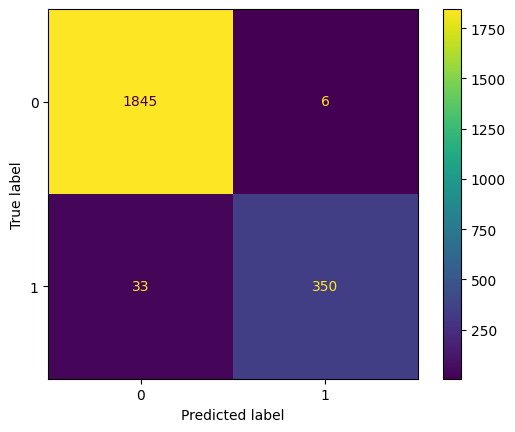

In [101]:
cm = confusion_matrix(y_test, grid_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [102]:
print(classification_report(y_test,grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1851
           1       0.98      0.91      0.95       383

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



The classification of the XGBoost model shows a similar effectiveness in predicting 'Left' values as the top performing Random Forest Model, with 1 less inaccurate classification (total 39 false positive+false negative).

The weighted average of precision, recall, and f-1 are all 98%, the same as the random forest model.

### **Feature Importance in predicting 'Left' variable**

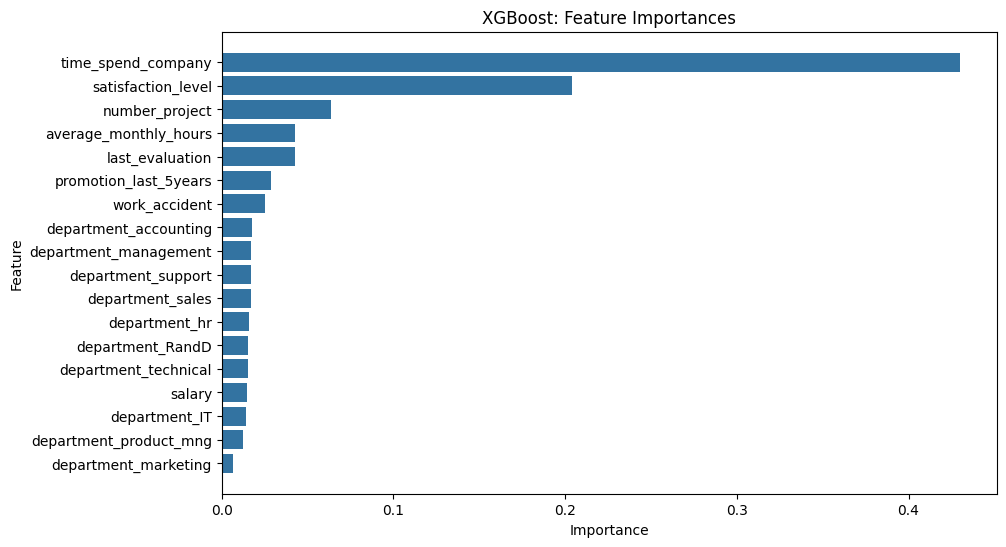

In [107]:
# Retrieve the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Get feature importances from the best estimator
feature_importances = best_estimator.feature_importances_

# Get the names of the features
feature_names = df1a.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Sort the DataFrame by importance
sorted_df = importance_df.sort_values("Importance")

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.barh(sorted_df["Feature"], sorted_df["Importance"], color='#3373a1')

plt.title("XGBoost: Feature Importances", fontsize=12)
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.show()

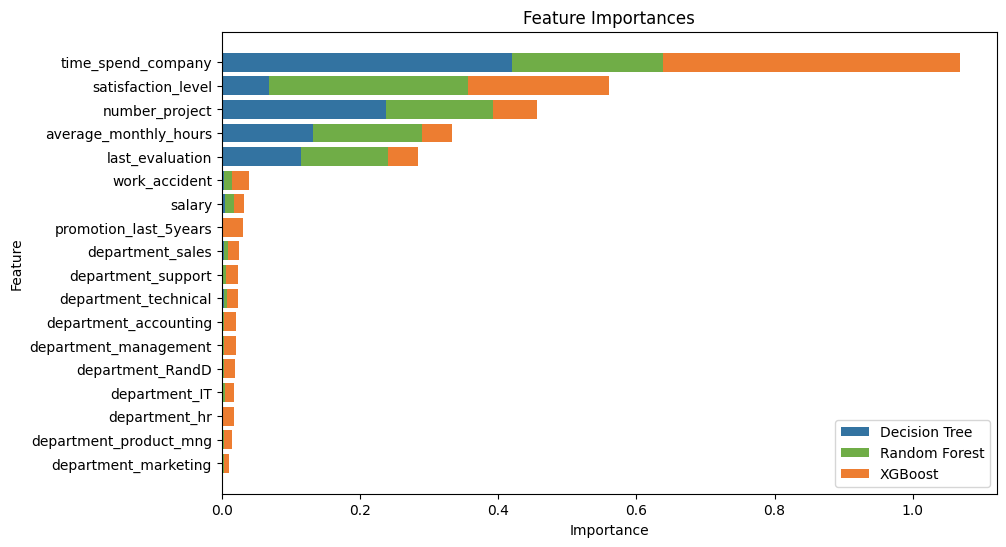

In [114]:
# Get feature importances from the best classifier (Decision Tree)
dt_feature_importances = best_clf.feature_importances_

# Get feature importances from the best estimator of the Random Forest model
rf_feature_importances = rf1.best_estimator_.feature_importances_

# Get feature importances from the best estimator (XGBoost)
xgb_feature_importances = best_estimator.feature_importances_

# Get the names of the features
feature_names = x_over.columns

# Calculate the total importance for each feature
total_importance = dt_feature_importances + rf_feature_importances + xgb_feature_importances

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({"Feature": feature_names,
                              "Decision Tree": dt_feature_importances,
                              "Random Forest": rf_feature_importances,
                              "XGBoost": xgb_feature_importances,
                              "Total": total_importance})

# Sort the DataFrame by total importance
sorted_df = importance_df.sort_values("Total")

# Set the colors for each feature
colors = ["#3373a1", "#70ad47", "#ed7d31"]

# Create a horizontal stacked bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.barh(sorted_df["Feature"], sorted_df["Decision Tree"], color=colors[0], label="Decision Tree")
plt.barh(sorted_df["Feature"], sorted_df["Random Forest"], color=colors[1], label="Random Forest", left=sorted_df["Decision Tree"])
plt.barh(sorted_df["Feature"], sorted_df["XGBoost"], color=colors[2], label="XGBoost", left=sorted_df["Decision Tree"] + sorted_df["Random Forest"])

plt.title("Feature Importances", fontsize=12)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend()

plt.show()

Through analyzing the different feature importances of Decision Trees, Random Forest, and XGBoost, it can be identified that the top 5 features in predicting employee turnover are time_spend_company, satisfaction_level, number_project, average_monthly_hours, and last_evaluation in descending order of importance.

Interestingly, the XGBoost and Random Forest performed similarly, but the two models weigh the features differently, with XGBoost placing more importance on the time spent in the company rather than satisfaction level (Random Forest's feature with the highest importance). This can be further investigated in future studies.

## Execute
Lastly, we will evaluate the model performance in the execute stage, fine-tuning necessary areas before reiterating the steps to construct a more accurate classification model.

### **Conclusion**

It can be found that Random Forest and XGBoost performed the best when predicting the variable 'Left', with a weighted average precision, recall, and f1-score of 98%. XGBoost performed slightly better, but the improvement amount is neglectible.

The factors that influence the employee's decision to leave the company in order of significance:
1. time_spend_company
2. satisfaction_level
3. number_project
4. average_monthly_hours
5. last_evaluation

Interestingly, the Random Forest and XGBoost model performed similarly, but the two models weigh the features differently, suggesting a future research direction into which features are more important.

In [115]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost'],
    'Precision': [0.90, 0.96, 0.93, 0.98, 0.98],
    'Recall': [0.83, 0.96, 0.91, 0.98, 0.98],
    'F1-Score': [0.85, 0.96, 0.92, 0.98, 0.98],
    'Support': [2234, 2234, 2234, 2234, 2234]
}

df3 = pd.DataFrame(data)

print(df3)

                 Model  Precision  Recall  F1-Score  Support
0  Logistic Regression       0.90    0.83      0.85     2234
1        Decision Tree       0.96    0.96      0.96     2234
2                  KNN       0.93    0.91      0.92     2234
3        Random Forest       0.98    0.98      0.98     2234
4              XGBoost       0.98    0.98      0.98     2234


### **Recommendations**

**Time_spend_company** : Employees that have stayed for 4 years have very low satisfaction scores, resulting in a loss of experienced workers.
1. Launch an investigation into why employees that have stayed with Salifort for 4 years have very low satisfaction scores.
2. Reward employees that have stayed longer with the company with higher compensation / perks

**Satisfaction_level:** Employees with less than 0.5 indicated on the satisfaction survey are at a high risk of leaving the company.
3. Managers should reach out to employees that have high risk of turnover, constructively consult them on areas to improve satisfaction eg workload, training and development etc

**Number_of_project:** Employees that work more than 5 projects have a significant deterioration of work satisfaction
4. Limit the number of projects employees work on to a maximum of 5

**Average_monthly_hours**: Employees that exceed more than 250 hours a month have a high rate of turnover due to burnout or inadequate compensation.
5. To address overwork by employees, managers should re-evaluate project timelines and create a manageable working schedule for employees.
6. Managers can consider hiring more employees to prevent overwork current teams.
7. An investigation must be conducted on whether employeees are compensated fairly for overtime work
8. A working culture of reducing overtime work must be put in place to reduce pressure to outperform.

**Last_evaluation_score:**
Higher evaluation scores are largely correlated to employees working longer hours at the company
9. Managers should evaluate processes that are tedious and take large amounts of time, and identify methods to remove inefficient procedures.
10. An investigation into the manager's evaluation process should be conducted, with the evaluation process focusing more on work outcomes and not on time spent on the task.